In [7]:
import glob
import dlib
import cv2
import pickle
import random
import facevec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib

In [8]:
model = joblib.load('gender_class.pkl')

In [9]:
name = ['Male: ', 'Female: ']

In [10]:
font = cv2.FONT_HERSHEY_DUPLEX

In [11]:
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    if not ret:
        break

    img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    faces = facevec.detector(img,1)
    
    if len(faces) > 0:
        for i in range(len(faces)):
            
            f = faces[i]
            shapes = facevec.predictor(img,f)
            face_descriptor = facevec.face_model.compute_face_descriptor(img, shapes)
            face_descriptor = np.array(face_descriptor)
            descriptor = face_descriptor.reshape(1,-1)
            gender = model.predict_proba(descriptor)
            
            person = name[gender.argmax()]
            album = gender.argmax()
                
            
            cv2.rectangle(img,(f.left(), f.top()), (f.right(),f.top()-20),(0,255,0), -1)
            cv2.rectangle(img, (f.left(), f.top()), (f.right(), f.bottom()),(0,255,0),1)
            cv2.putText(img,   person +
                        str(int(gender[0][gender.argmax()] * 100))+'%', (f.left(),f.top()), font, 0.6, (255,255,255), 0)


    cv2.imshow('image',img)
    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [6]:
cap.release()
cv2.destroyAllWindows()

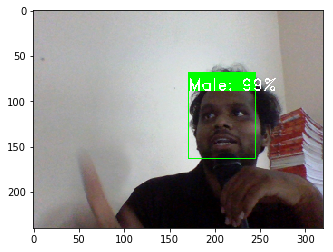

In [13]:
b, g, r = cv2.split(img)
img_new = cv2.merge((r,g,b))
plt.imshow(img_new)
plt.show()

# from image

In [ ]:
img = cv2.imread('test_img.jpg')
faces = facevec.detector(img,1)

if len(faces) > 0:
    for i in range(len(faces)):

        f = faces[i]
        shapes = facevec.predictor(img,f)
        face_descriptor = facevec.face_model.compute_face_descriptor(img, shapes)
        face_descriptor = np.array(face_descriptor)
        descriptor = face_descriptor.reshape(1,-1)
        gender = model.predict_proba(descriptor)

        person = name[gender.argmax()]
        album = gender.argmax()


        cv2.rectangle(img,(f.left(), f.top()), (f.right(),f.top()-20),(0,255,0), -1)
        cv2.rectangle(img, (f.left(), f.top()), (f.right(), f.bottom()),(0,255,0),1)
        cv2.putText(img,   person +
                    str(int(gender[0][gender.argmax()] * 100))+'%', (f.left(),f.top()), font, 0.6, (255,255,255), 0)


cv2.imshow('image',img)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [15]:
cv2.imwrite('facere.png',img)

True

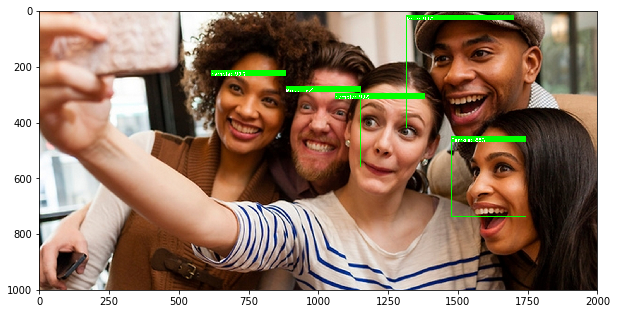

In [20]:
b, g, r = cv2.split(img)
img_new = cv2.merge((r,g,b))
plt.figure(figsize=(10,10))
plt.imshow(img_new)
plt.show()